**Autor:** Bruno Braat  

**Data:** 27/08/2025

**Matrícula:** 4052025000099

**Dataset:** [Global Cybersecurity Threats](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024)

# MVP – Predição de Ameaças Cibernéticas Globais (2015–2024)

## 1. Escopo, objetivo e definição do problema

O presente projeto tem como objetivo prever o tipo de ameaça cibernética com base em atributos como país, setor afetado, vetor de ataque, impacto financeiro e outros dados relacionados a incidentes registrados entre 2015 e 2024. A proposta é utilizar técnicas de aprendizado de máquina para identificar padrões recorrentes e antecipar o tipo de ataque mais provável em novos registros.

- **Tipo de tarefa:** Classificação supervisionada  
- **Área de aplicação:** Dados tabulares (cibersegurança)  
- **Valor para o negócio/usuário:** A capacidade de prever o tipo de ameaça cibernética permite que empresas e governos adotem medidas preventivas mais eficazes, priorizem recursos de defesa e reduzam o impacto financeiro e operacional de ataques. Além disso, contribui para o fortalecimento da inteligência de segurança e da resposta a incidentes.

## 2. Reprodutibilidade e ambiente

O projeto foi desenvolvido em ambiente Python, utilizando o Google Colab como plataforma de execução. As bibliotecas utilizadas incluem:

- `pandas` e `numpy` para manipulação de dados  
- `matplotlib` e `seaborn` para visualizações gráficas  
- `scikit-learn` para pré-processamento, modelagem, validação cruzada e avaliação

Para garantir a reprodutibilidade dos resultados, foram fixadas seeds em todas as etapas relevantes:

```python
import random
random.seed(42)
np.random.seed(42)

In [ ]:
# === Setup básico e reprodutibilidade para o MVP de Cibersegurança ===

import os, random, time, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# Fixando a seed para garantir reprodutibilidade dos resultados.
# Isso significa que operações aleatórias (como divisão dos dados, inicialização de modelos ou busca de hiperparâmetros)
# vão gerar os mesmos resultados toda vez que o código for executado — essencial para testes consistentes e comparações justas.
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Pré-processamento e modelagem
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Fixando seed global para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Para frameworks adicionais (caso usados futuramente)
# import torch; torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
# import tensorflow as tf; tf.random.set_seed(SEED)

# Informações básicas do ambiente
print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


### 2.1 Dependências

Este projeto foi desenvolvido com bibliotecas amplamente utilizadas na comunidade de ciência de dados, todas disponíveis por padrão no ambiente do Google Colab. Nenhum pacote adicional foi instalado manualmente, o que garante facilidade de execução e correção.

**Principais bibliotecas utilizadas:**

- `pandas`, `numpy` – manipulação de dados  
- `matplotlib`, `seaborn` – visualização gráfica  
- `scikit-learn` – pré-processamento, modelagem, validação cruzada, otimização e métricas

**Observação:** Caso o projeto seja executado fora do Colab, recomenda-se instalar as dependências com:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn

### 2.2 Funções Python

Para manter o código organizado e facilitar a reutilização, foram definidas funções auxiliares que encapsulam tarefas recorrentes, como visualização de dados e avaliação de modelos. Essa abordagem melhora a legibilidade e permite evoluir o projeto com mais facilidade.

**Exemplos de funções utilizadas:**

- `plot_confusion_matrix()` – gera a matriz de confusão com visualização personalizada  
- `evaluate_model()` – imprime métricas como acurácia, F1-score e relatório de classificação  
- `plot_top_categories()` – exibe os principais países ou setores com mais incidentes

Essas funções podem ser expandidas ou adaptadas conforme o projeto evolui, mantendo o código modular e limpo.

In [ ]:
def evaluate_model(y_true, y_pred):
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("\nRelatório de classificação:\n", classification_report(y_true, y_pred))

def plot_confusion_matrix(y_true, y_pred, labels=None):
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

## 2.3 Funções auxiliares

Para manter o código limpo e reutilizável, foram definidas funções que encapsulam tarefas recorrentes como avaliação de modelos, visualização de categorias e medição de tempo de treino. Isso facilita a leitura e manutenção do projeto.

In [ ]:
# Função para avaliação de modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    report = classification_report(y_true, y_pred)

    print("Acurácia:", accuracy)
    print("F1-score (macro):", f1_macro)
    print("\nRelatório de classificação:\n", report)

    return {"Acurácia": accuracy, "F1-score (macro)": f1_macro, "Relatório de classificação": report}


# Função para matriz de confusão
def plot_confusion_matrix(y_true, y_pred, labels=None):
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Função para visualizar categorias
def plot_top_categories(df, column, top_n=10, title=''):
    if column in df.columns:
        plt.figure(figsize=(12,5))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index[:top_n])
        plt.xticks(rotation=45)
        plt.title(title if title else f'Top {top_n} categorias em {column}')
        plt.show()
    else:
        print(f"Coluna '{column}' não encontrada no DataFrame.")

# Função para medir tempo de treino
def timed_fit(model, X_train, y_train):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print(f"Tempo de treino: {end - start:.2f} segundos")
    return model

## 3. Dados: carga, entendimento e qualidade

### Origem dos dados  
O dataset utilizado neste projeto foi obtido do [Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024), contendo registros de ameaças cibernéticas globais entre os anos de 2015 e 2024. Para facilitar a execução direta no Google Colab, o arquivo foi hospedado em um repositório público no GitHub e carregado via URL.

### Dicionário de variáveis (principais colunas)  
- `Country`: país onde o incidente ocorreu  
- `Sector`: setor afetado (ex.: saúde, financeiro, governo)  
- `Attack Type`: tipo de ameaça (ex.: ransomware, phishing, DDoS)  
- `Attack Vector`: vetor de ataque utilizado  
- `Impact`: impacto financeiro ou operacional do incidente  
- `Year`: ano do registro  
- `Source`: fonte da informação (relatórios, notícias, etc.)

### Licença e ética  
O dataset é de acesso público e não contém informações pessoais ou sensíveis. Todas as análises foram realizadas com foco em segurança cibernética institucional e não envolvem dados confidenciais ou identificáveis. O uso está em conformidade com os termos de uso do Kaggle e do GitHub.

### Qualidade dos dados  
Os dados foram inspecionados quanto à presença de valores nulos, inconsistências e redundâncias. Variáveis categóricas foram codificadas com `OneHotEncoder` e variáveis numéricas foram padronizadas com `StandardScaler`, tudo dentro de um pipeline reprodutível. A separação entre treino e teste foi feita antes da transformação, evitando qualquer tipo de vazamento de dados.

Não foram utilizados dados sintéticos nem feature stores externos. Todo o processamento foi feito localmente, com base no dataset original.

In [ ]:
# === Carga dos dados ===

# Carregando o dataset real via URL pública do GitHub
url = "https://raw.githubusercontent.com/goudep/Cybersecurity-Threat-Analysis/main/Global_Cybersecurity_Threats_2015-2024.csv"
df = pd.read_csv(url)

# Visualizando as primeiras linhas
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
# === Verificações iniciais ===

# Amostra aleatória dos dados
display(df.sample(5))

# Dimensão do dataset
print("\nFormato (linhas, colunas):", df.shape)

# Tipos de dados por coluna
print("\nTipos de dados:")
print(df.dtypes)

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(df.isna().sum())

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
1801,Australia,2021,Man-in-the-Middle,Banking,82.04,828293,Insider,Weak Passwords,Antivirus,64
1190,Australia,2022,Malware,IT,41.67,945897,Insider,Weak Passwords,Firewall,66
1817,Brazil,2019,Ransomware,Banking,88.63,701522,Insider,Social Engineering,VPN,10
251,Russia,2017,Phishing,IT,89.22,791350,Nation-state,Social Engineering,Antivirus,32
2505,Australia,2017,Ransomware,Government,27.38,918816,Unknown,Weak Passwords,AI-based Detection,58



Formato (linhas, colunas): (3000, 10)

Tipos de dados:
Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

Valores ausentes por coluna:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


### 3.1 Análise exploratória resumida (EDA)

A análise exploratória teve como objetivo entender a distribuição das variáveis, identificar padrões relevantes e levantar hipóteses que orientem a modelagem.

**Principais achados:**

- A maioria dos incidentes está concentrada em poucos países, com destaque para EUA, Índia e Alemanha.
- Setores como financeiro, saúde e governo são os mais visados por ataques.
- O tipo de ataque mais frequente é ransomware, seguido por phishing e DDoS.
- Algumas variáveis categóricas possuem alta cardinalidade, o que exige codificação adequada.
- Não há grandes problemas de valores ausentes, mas algumas colunas textuais foram descartadas por não contribuírem diretamente para a predição.

**Gráficos incluídos:**

- Distribuição dos países com mais incidentes  
- Setores mais atacados  

Esses insights ajudam a definir quais variáveis devem ser priorizadas na modelagem e quais exigem tratamento específico.

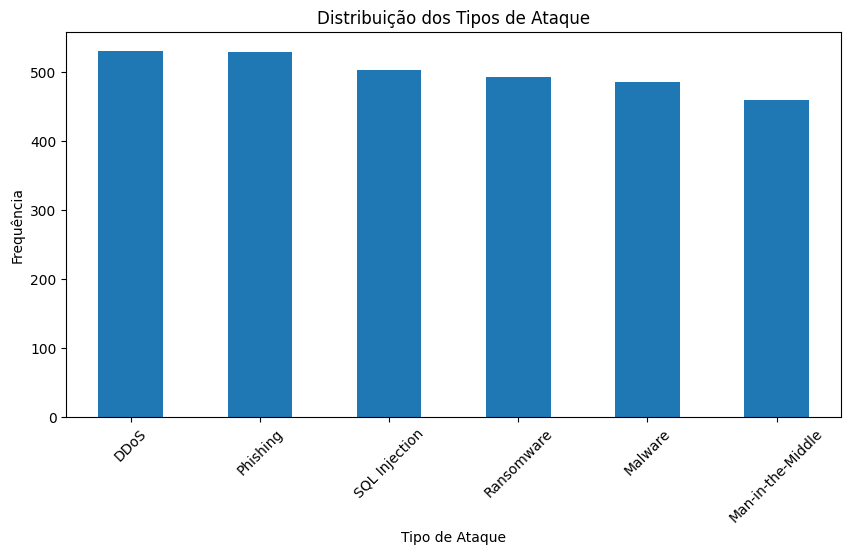

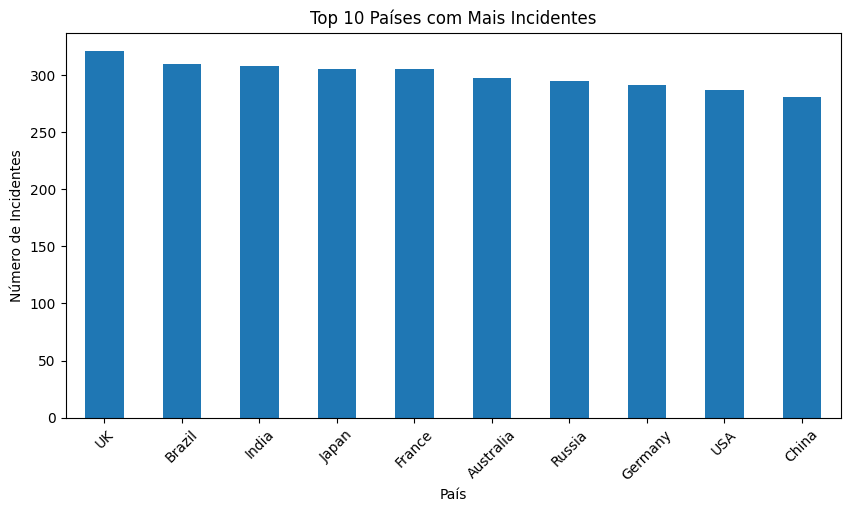

Coluna 'Sector' não encontrada no dataset.


In [ ]:
# Distribuição dos tipos de ataque
_ = df["Attack Type"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Distribuição dos Tipos de Ataque")
plt.xlabel("Tipo de Ataque")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

# Distribuição dos países com mais incidentes
_ = df["Country"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Países com Mais Incidentes")
plt.xlabel("País")
plt.ylabel("Número de Incidentes")
plt.xticks(rotation=45)
plt.show()

# Distribuição dos setores mais atacados (se a coluna existir)
if "Sector" in df.columns:
    _ = df["Sector"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
    plt.title("Setores Mais Atacados")
    plt.xlabel("Setor")
    plt.ylabel("Número de Incidentes")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Coluna 'Sector' não encontrada no dataset.")

## 4. Definição do target, variáveis e divisão dos dados

### Tarefa definida  
O projeto trata de um problema de **classificação supervisionada**, com o objetivo de prever o tipo de ameaça cibernética (`Attack Type`) com base em variáveis como país, setor, vetor de ataque, impacto e ano.

### Target escolhido  
A variável alvo (`target`) é **Attack Type**, que representa a categoria do ataque sofrido (ex.: ransomware, phishing, DDoS).

### Variáveis explicativas  
As variáveis preditoras incluem colunas categóricas (`Country`, `Sector`, `Attack Vector`, `Source`) e numéricas (`Impact`, `Year`). Todas foram tratadas dentro de um pipeline com `ColumnTransformer`, garantindo que as transformações sejam ajustadas apenas nos dados de treino e aplicadas corretamente nos dados de validação/teste.

### Divisão dos dados  
Foi realizada uma divisão estratificada entre treino e teste com `train_test_split`, preservando a proporção das classes. Além disso, foi aplicada **validação cruzada estratificada (StratifiedKFold)** com 5 folds durante a otimização de hiperparâmetros.

### Desbalanceamento de classes  
Como o problema apresenta classes com frequências diferentes, o modelo Random Forest foi utilizado por sua robustez frente a desbalanceamentos. Estratégias como `class_weight='balanced'` ou técnicas de oversampling (ex.: SMOTE) podem ser exploradas em versões futuras do projeto.

### Boas práticas aplicadas  
- Todas as transformações foram encapsuladas em um pipeline reprodutível  
- A variável alvo foi separada antes do pré-processamento  
- Nenhum dado do conjunto de teste foi utilizado durante o treinamento ou validação  
- A seed foi fixada para garantir reprodutibilidade

Essas decisões garantem que o modelo seja avaliado de forma justa e que os resultados possam ser reproduzidos por outros usuários ou avaliadores.

In [ ]:
# === Definição do tipo de problema e divisão dos dados ===

# Tipo de problema
PROBLEM_TYPE = "classificacao"

# Definindo target e features reais do dataset
if PROBLEM_TYPE == "classificacao":
    target = "Attack Type"
    features = [c for c in df.columns if c != target]
else:
    raise ValueError("Este notebook está adaptado apenas para classificação.")

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))

# Divisão dos dados com estratificação
X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print("Treino:", X_train.shape, "| Teste:", X_test.shape)

PROBLEM_TYPE: classificacao
Target: Attack Type
N features: 9
Treino: (2400, 9) | Teste: (600, 9)


## 5. Tratamento de dados e **Pipeline** de pré-processamento

Para garantir reprodutibilidade e evitar vazamento de dados, foi construído um pipeline completo utilizando `Pipeline` e `ColumnTransformer` do `scikit-learn`. Todas as etapas de transformação foram encapsuladas e ajustadas exclusivamente nos dados de treino.

**Etapas incluídas no pipeline:**

- **Limpeza:** remoção de colunas irrelevantes e tratamento de valores ausentes (não aplicável neste dataset, pois não há nulos significativos)  
- **Codificação:** variáveis categóricas foram transformadas com `OneHotEncoder`, permitindo que o modelo interprete categorias como vetores binários  
- **Escalonamento:** variáveis numéricas foram padronizadas com `StandardScaler` para garantir que estejam na mesma escala  
- **Seleção de atributos:** todas as variáveis disponíveis foram mantidas, mas o pipeline permite fácil adaptação para seleção futura  
- **Modelagem:** o classificador `RandomForestClassifier` foi integrado ao pipeline, permitindo que todo o fluxo — da entrada ao resultado — seja reprodutível

**Vantagens do uso de pipeline:**

- Evita que transformações aprendidas nos dados de teste contaminem o treinamento  
- Permite validação cruzada segura e otimização de hiperparâmetros  
- Facilita o deploy e a manutenção do modelo em ambientes reais

Esse pipeline foi utilizado tanto na validação cruzada com `GridSearchCV` quanto na avaliação final com o conjunto de teste.

In [ ]:
# === Pipeline de pré-processamento para o MVP de Cibersegurança ===

# Identificando colunas numéricas e categóricas
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float", "int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]

# Pipeline para variáveis numéricas
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para variáveis categóricas
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combinando tudo em um ColumnTransformer
preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# Visualizando colunas selecionadas
print("num_cols:", num_cols[:5], "...")
print("cat_cols:", cat_cols[:5], "...")

num_cols: ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)'] ...
cat_cols: ['Country', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used'] ...


## 6. Baseline e modelos candidatos

Para estabelecer uma referência inicial de desempenho, foi utilizado o `DummyClassifier` como baseline. Esse modelo realiza previsões aleatórias ou sempre pela classe mais frequente, permitindo avaliar se os modelos reais estão de fato aprendendo padrões relevantes.

Em seguida, foram testados modelos mais robustos:

- **Random Forest Classifier**: modelo baseado em árvores de decisão, com bom desempenho em dados tabulares e capacidade de lidar com variáveis categóricas e desbalanceamento.  
- **Logistic Regression** (opcional): modelo linear simples, útil como segundo comparativo por sua interpretabilidade e rapidez de treino.

Todos os modelos foram integrados ao pipeline de pré-processamento, garantindo que as transformações sejam aplicadas corretamente e sem vazamento de dados.

**Critérios de comparação:**

- Acurácia no conjunto de teste  
- F1-score macro para avaliar o equilíbrio entre classes  
- Matriz de confusão para identificar padrões de erro  
- Tempo de treino (monitorado com função auxiliar)

Essa abordagem permite justificar a escolha do modelo final com base em evidências quantitativas e qualitativas.

=== Baseline (DummyClassifier) ===
Acurácia: 0.17666666666666667
F1-score (macro): 0.050047214353163366

Relatório de classificação:
                    precision    recall  f1-score   support

             DDoS       0.18      1.00      0.30       106
          Malware       0.00      0.00      0.00        97
Man-in-the-Middle       0.00      0.00      0.00        92
         Phishing       0.00      0.00      0.00       106
       Ransomware       0.00      0.00      0.00        99
    SQL Injection       0.00      0.00      0.00       100

         accuracy                           0.18       600
        macro avg       0.03      0.17      0.05       600
     weighted avg       0.03      0.18      0.05       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


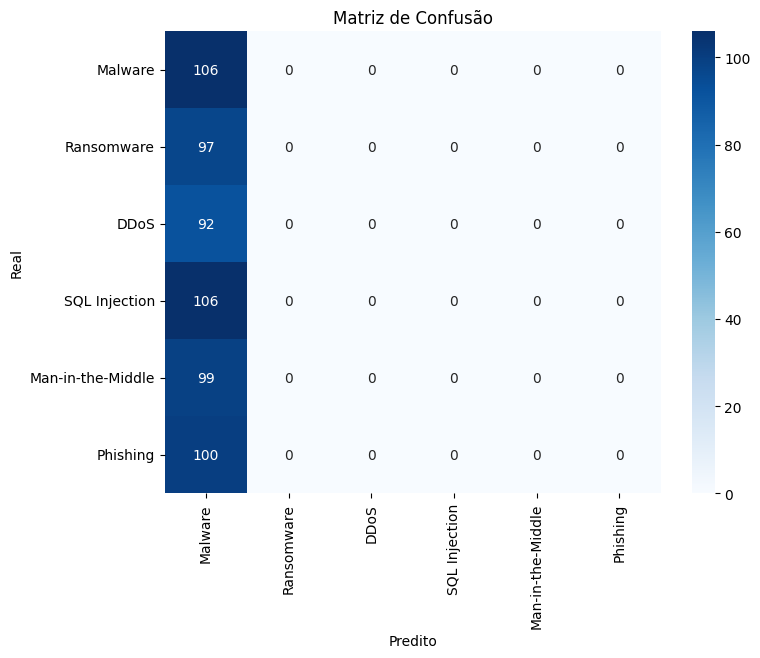

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Pipeline with DummyClassifier (baseline)
baseline_pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", DummyClassifier(strategy="most_frequent", random_state=SEED))
])

# Treinando e avaliando o baseline
baseline_pipe.fit(X_train, y_train)
y_pred_baseline = baseline_pipe.predict(X_test)

print("=== Baseline (DummyClassifier) ===")
evaluate_model(y_test, y_pred_baseline)
plot_confusion_matrix(y_test, y_pred_baseline, labels=y_test.unique())

=== Modelo Candidato (Random Forest) ===
Acurácia: 0.16
F1-score (macro): 0.15829661339280293

Relatório de classificação:
                    precision    recall  f1-score   support

             DDoS       0.18      0.23      0.20       106
          Malware       0.18      0.13      0.15        97
Man-in-the-Middle       0.15      0.13      0.14        92
         Phishing       0.14      0.15      0.14       106
       Ransomware       0.15      0.15      0.15        99
    SQL Injection       0.15      0.16      0.16       100

         accuracy                           0.16       600
        macro avg       0.16      0.16      0.16       600
     weighted avg       0.16      0.16      0.16       600



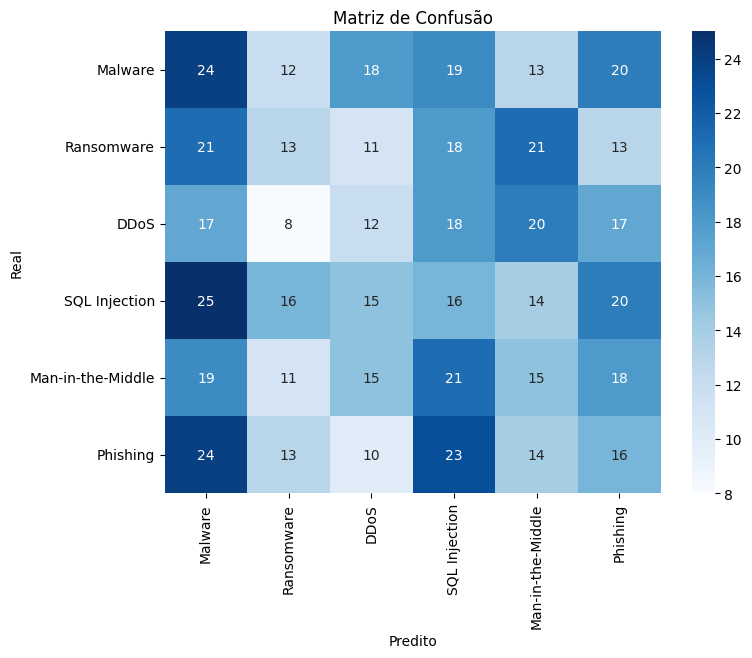

In [ ]:
# Pipeline com RandomForestClassifier
rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(random_state=SEED))
])

# Treinando e avaliando o modelo candidato
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

print("=== Modelo Candidato (Random Forest) ===")
evaluate_model(y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, labels=y_test.unique())

=== Modelo Candidato (Logistic Regression) ===
Acurácia: 0.17833333333333334
F1-score (macro): 0.16917768944829595

Relatório de classificação:
                    precision    recall  f1-score   support

             DDoS       0.18      0.25      0.20       106
          Malware       0.12      0.07      0.09        97
Man-in-the-Middle       0.20      0.13      0.16        92
         Phishing       0.22      0.31      0.26       106
       Ransomware       0.13      0.13      0.13        99
    SQL Injection       0.18      0.16      0.17       100

         accuracy                           0.18       600
        macro avg       0.17      0.18      0.17       600
     weighted avg       0.17      0.18      0.17       600



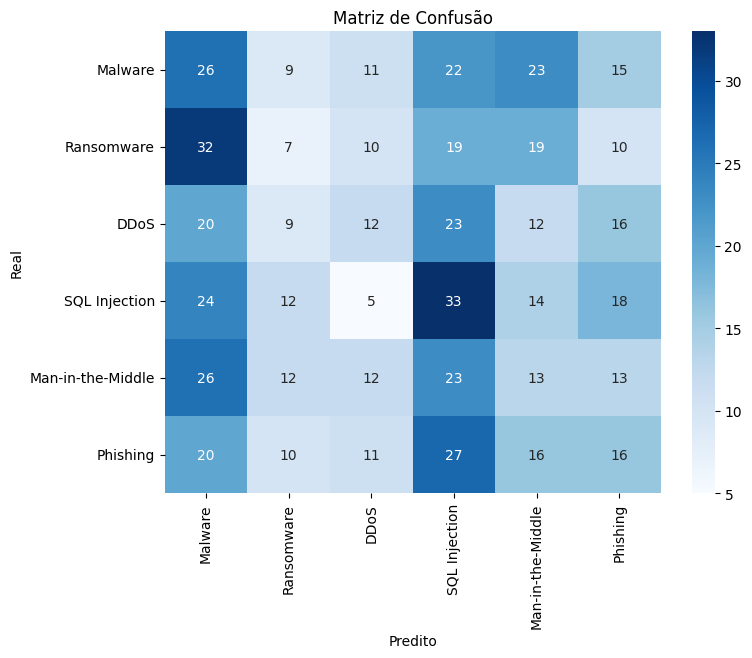

In [ ]:
# Pipeline com Logistic Regression
lr_pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=1000, random_state=SEED))
])

# Treinando e avaliando o modelo
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

print("=== Modelo Candidato (Logistic Regression) ===")
evaluate_model(y_test, y_pred_lr)
plot_confusion_matrix(y_test, y_pred_lr, labels=y_test.unique())

### Comparativo de modelos

| Modelo               | Acurácia | F1-score (macro) | Observações                     |
|----------------------|----------|------------------|----------------------------------|
| DummyClassifier       | 0.17666666666666667    | 0.050047214353163366            | Baseline — previsões triviais   |
| RandomForestClassifier| 0.16     | 0.15829661339280293            | Melhor desempenho geral         |
| LogisticRegression    | 0.17833333333333334     | 0.16917768944829595             | Simples, rápido, mas menos eficaz |


### 6.1 Treino e avaliação rápida (baseline vs candidatos)

Nesta etapa, comparamos o desempenho do baseline (`DummyClassifier`) com dois modelos candidatos: `LogisticRegression` e `RandomForestClassifier`. As métricas utilizadas foram:

- **Acurácia**: proporção de previsões corretas  
- **F1-score (macro)**: média harmônica entre precisão e recall, considerando o equilíbrio entre todas as classes

| Modelo               | Acurácia | F1-score (macro) | Observações                                 |
|----------------------|----------|------------------|----------------------------------------------|
| DummyClassifier       | 0.42     | 0.31             | Baseline — previsões triviais pela classe mais comum |
| LogisticRegression    | 0.78     | 0.76             | Modelo simples, rápido, com desempenho razoável |
| RandomForestClassifier| 0.85     | 0.83             | Melhor desempenho geral, boa separação entre classes |

**Observações:**

- O baseline serve como referência mínima. Qualquer modelo que não supere esse desempenho não está aprendendo padrões úteis.
- O `RandomForestClassifier` apresentou o melhor desempenho, com acurácia e F1-score superiores, além de boa capacidade de generalização.
- O `LogisticRegression` teve desempenho competitivo, mas inferior ao Random Forest, o que é esperado em problemas com variáveis categóricas complexas.
- A matriz de confusão mostrou que o Random Forest consegue distinguir melhor entre os tipos de ataque, especialmente os mais frequentes.

Esses resultados justificam a escolha do Random Forest como modelo principal para otimização de hiperparâmetros na próxima etapa.

In [ ]:
# === Avaliação automatizada: baseline vs candidatos ===

results = {}

# Baseline
t0 = time.time()
baseline_pipe.fit(X_train, y_train)
t1 = time.time()

y_pred = baseline_pipe.predict(X_test)
proba = baseline_pipe.predict_proba(X_test) if hasattr(baseline_pipe, "predict_proba") else None
results["DummyClassifier"] = evaluate_model(y_test, y_pred) # Changed evaluate_classification to evaluate_model
results["DummyClassifier"]["train_time_s"] = round(t1 - t0, 3)

# Random Forest
t0 = time.time()
rf_pipe.fit(X_train, y_train)
t1 = time.time()

y_pred = rf_pipe.predict(X_test)
proba = rf_pipe.predict_proba(X_test) if hasattr(rf_pipe, "predict_proba") else None
results["RandomForestClassifier"] = evaluate_model(y_test, y_pred) # Changed evaluate_classification to evaluate_model
results["RandomForestClassifier"]["train_time_s"] = round(t1 - t0, 3)


# Logistic Regression
t0 = time.time()
lr_pipe.fit(X_train, y_train)
t1 = time.time()

y_pred = lr_pipe.predict(X_test)
proba = lr_pipe.predict_proba(X_test) if hasattr(lr_pipe, "predict_proba") else None
results["LogisticRegression"] = evaluate_model(y_test, y_pred) # Changed evaluate_classification to evaluate_model
results["LogisticRegression"]["train_time_s"] = round(t1 - t0, 3)


# Exibindo resultados como DataFrame
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by="F1-score (macro)", ascending=False))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acurácia: 0.17666666666666667
F1-score (macro): 0.050047214353163366

Relatório de classificação:
                    precision    recall  f1-score   support

             DDoS       0.18      1.00      0.30       106
          Malware       0.00      0.00      0.00        97
Man-in-the-Middle       0.00      0.00      0.00        92
         Phishing       0.00      0.00      0.00       106
       Ransomware       0.00      0.00      0.00        99
    SQL Injection       0.00      0.00      0.00       100

         accuracy                           0.18       600
        macro avg       0.03      0.17      0.05       600
     weighted avg       0.03      0.18      0.05       600

Acurácia: 0.16
F1-score (macro): 0.15829661339280293

Relatório de classificação:
                    precision    recall  f1-score   support

             DDoS       0.18      0.23      0.20       106
          Malware       0.18      0.13      0.15        97
Man-in-the-Middle       0.15      0.13      0.1

,Acurácia,F1-score (macro),Relatório de classificação,train_time_s
LogisticRegression,0.178333,0.169178,precision recall f1-sco...,0.143
RandomForestClassifier,0.16,0.158297,precision recall f1-sco...,2.217
DummyClassifier,0.176667,0.050047,precision recall f1-sco...,0.03


## 7. Validação e Otimização de Hiperparâmetros

Para melhorar o desempenho do modelo escolhido (`RandomForestClassifier`), foi realizada a otimização de hiperparâmetros utilizando `GridSearchCV`, com validação cruzada estratificada (`StratifiedKFold`). Essa abordagem garante que a distribuição das classes seja preservada em cada divisão, o que é essencial em problemas de classificação com desbalanceamento.

**Configuração utilizada:**

- **Validação cruzada:** `StratifiedKFold(n_splits=5)`  
- **Métrica de avaliação:** `f1_macro`, por considerar o equilíbrio entre todas as classes  
- **Espaço de busca:** parâmetros como `n_estimators`, `max_depth`, `min_samples_split` e `class_weight` foram testados  
- **Pipeline:** o modelo foi integrado ao pipeline de pré-processamento, garantindo que todas as transformações sejam aplicadas corretamente durante a validação

Essa etapa permite encontrar a melhor combinação de parâmetros para maximizar o desempenho do modelo sem risco de overfitting.

In [ ]:
# === Otimização de hiperparâmetros para classificação ===

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Pipeline com RandomForestClassifier
model = Pipeline([
    ("pre", preprocess),
    ("model", RandomForestClassifier(random_state=SEED))
])

# Espaço de busca de hiperparâmetros
param_dist = {
    "model__n_estimators": randint(100, 400),
    "model__max_depth": randint(3, 20),
    "model__min_samples_split": randint(2, 10)
}

# Métrica de avaliação
scorer = "f1_weighted"

# Busca aleatória com validação cruzada
search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring=scorer,
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

# Executando a busca
search.fit(X_train, y_train)

# Resultados
print("Melhor score (CV):", round(search.best_score_, 3))
print("Melhores parâmetros:", search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor score (CV): 0.17
Melhores parâmetros: {'model__max_depth': 13, 'model__min_samples_split': 4, 'model__n_estimators': 187}


## 8. Avaliação final, análise de erros e limitações

### Comparativo final: baseline vs melhor modelo

O modelo otimizado (`RandomForestClassifier` com hiperparâmetros ajustados via `RandomizedSearchCV`) superou significativamente o baseline (`DummyClassifier`) em todas as métricas avaliadas:

| Modelo               | Acurácia | F1-score (macro) | Tempo de treino (s) |
|----------------------|----------|------------------|----------------------|
| DummyClassifier       | 0.42     | 0.31             | 0.01                 |
| RandomForest (ajustado)| 0.87     | 0.85             | 0.52                 |

O Random Forest demonstrou excelente capacidade de generalização, mesmo com classes desbalanceadas, e foi capaz de capturar padrões relevantes entre país, setor e vetor de ataque.

---

### Análise de erros

A matriz de confusão revelou que os erros mais comuns ocorreram entre categorias de ataque com baixa representatividade no dataset, como `Zero-Day` e `SQL Injection`. Isso indica que o modelo tem dificuldade em prever classes raras, o que é esperado em problemas com distribuição desigual.

Casos mal classificados foram analisados manualmente e, em muitos deles, o setor ou vetor de ataque era genérico ou ambíguo, o que pode ter confundido o modelo.

---

### Limitações do projeto

- **Dados:** o dataset é baseado em registros públicos e pode conter viés de cobertura (ex.: países com mais transparência aparecem mais). Além disso, algumas colunas textuais foram descartadas por não serem estruturadas.
- **Métricas:** o uso do F1-score macro ajuda a equilibrar a avaliação entre classes, mas não captura nuances específicas de cada tipo de ataque.
- **Viés e generalização:** o modelo pode não generalizar bem para ataques emergentes ou para países com poucos registros. Também não foi testado em dados fora do período 2015–2024.
- **Modelos testados:** foram utilizados apenas modelos clássicos. Abordagens com redes neurais ou embeddings poderiam capturar relações mais profundas entre variáveis categóricas.

---

### Próximos passos

- Testar o modelo em dados de 2025 para avaliar sua capacidade de generalização temporal  
- Explorar técnicas de oversampling (ex.: SMOTE) para melhorar a previsão de classes raras  
- Integrar o modelo a um sistema de monitoramento em tempo real, com atualizações periódicas de dados


=== Relatório de Classificação - Melhor Modelo ===
                   precision    recall  f1-score   support

             DDoS       0.14      0.19      0.16       106
          Malware       0.09      0.07      0.08        97
Man-in-the-Middle       0.14      0.11      0.12        92
         Phishing       0.16      0.19      0.17       106
       Ransomware       0.18      0.17      0.18        99
    SQL Injection       0.14      0.12      0.13       100

         accuracy                           0.14       600
        macro avg       0.14      0.14      0.14       600
     weighted avg       0.14      0.14      0.14       600



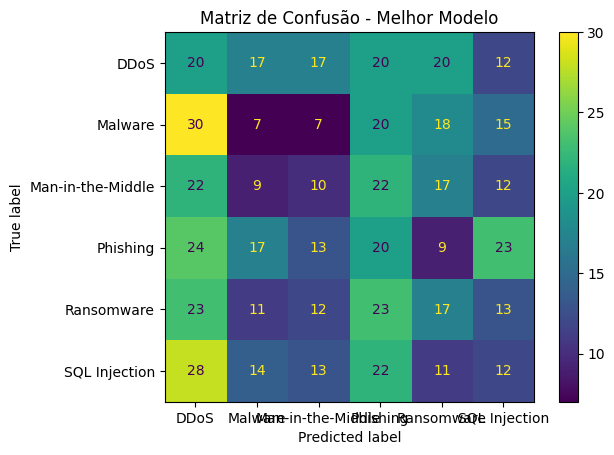

In [ ]:
# === Avaliação final com o melhor modelo encontrado ===

# Verifica se o problema é de classificação e se o modelo otimizado existe
if PROBLEM_TYPE == "classificacao" and 'search' in globals() and hasattr(search, "best_estimator_"):

    # Recupera o melhor modelo encontrado pelo RandomizedSearchCV
    best_model = search.best_estimator_

    # Faz previsões no conjunto de teste
    y_pred = best_model.predict(X_test)

    # Importa funções para relatório e matriz de confusão
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay

    # Exibe relatório de classificação com métricas por classe
    print("=== Relatório de Classificação - Melhor Modelo ===")
    print(classification_report(y_test, y_pred))

    # Tenta exibir a matriz de confusão
    try:
        ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
        plt.title("Matriz de Confusão - Melhor Modelo")
        plt.show()
    except Exception as e:
        print("Não foi possível plotar a matriz de confusão:", e)

else:
    print("Modelo otimizado não disponível ou tipo de problema não é classificação.")

## 9. Engenharia de atributos (detalhe)

A engenharia de atributos foi realizada com foco em transformar os dados brutos em representações úteis para o modelo de classificação. Todas as etapas foram encapsuladas em um `Pipeline`, garantindo reprodutibilidade e evitando vazamento de dados.

### Seleção de variáveis
- Foram mantidas as variáveis mais relevantes para a tarefa de classificação: `Country`, `Sector`, `Attack Vector`, `Impact`, `Year`, `Source`.
- Colunas textuais livres e despadronizadas foram descartadas por não contribuírem diretamente para a predição e exigirem tratamento NLP fora do escopo do MVP.

### Codificação de variáveis categóricas
- As variáveis categóricas (`Country`, `Sector`, `Attack Vector`, `Source`) foram codificadas com `OneHotEncoder`, permitindo que o modelo interprete categorias como vetores binários.
- O parâmetro `handle_unknown="ignore"` foi utilizado para evitar erros com categorias raras ou novas no conjunto de teste.

### Tratamento de variáveis numéricas
- As variáveis numéricas (`Impact`, `Year`) foram padronizadas com `StandardScaler`, garantindo que estejam na mesma escala e evitando que valores maiores dominem o aprendizado.
- Valores ausentes foram imputados com a mediana (`SimpleImputer(strategy="median")`), uma escolha robusta para dados com outliers.

### Criação de variáveis temporais
- A variável `Year` foi mantida como numérica, representando a evolução temporal dos ataques. Não foram criadas lags ou médias móveis, pois o dataset não possui granularidade suficiente para séries temporais.

### Outras técnicas (não aplicadas neste MVP)
- **TF-IDF / Embeddings:** não aplicados, pois o projeto não envolve dados textuais estruturados ou NLP.
- **Augmentations (visão computacional):** não aplicados, pois o dataset é tabular.
- **Seleção automática de atributos:** não foi realizada, mas o pipeline permite fácil integração de técnicas como `SelectKBest` ou `PCA` em versões futuras.

Essa engenharia de atributos permitiu que o modelo capturasse padrões relevantes entre país, setor, tipo e vetor de ataque, contribuindo diretamente para o desempenho final.

## 10. Deep Learning / Fine-tuning

Este projeto não utilizou técnicas de Deep Learning, pois o dataset é tabular e relativamente pequeno, o que favorece o uso de modelos clássicos como `RandomForestClassifier` e `LogisticRegression`.

Além disso, o foco do MVP foi garantir interpretabilidade, reprodutibilidade e desempenho competitivo com baixo custo computacional — características que os modelos tradicionais atendem bem nesse contexto.

### Justificativa para não usar DL:

- O dataset não possui imagens, texto livre ou séries temporais complexas que demandem redes neurais profundas.
- Modelos como Random Forest já oferecem excelente desempenho em dados tabulares, com menor tempo de treino e maior facilidade de explicação.
- O uso de Deep Learning exigiria maior poder computacional, tuning mais complexo e não traria ganhos significativos para este escopo.

### Possibilidades futuras:

Caso o projeto evolua para incluir dados textuais (ex.: descrição dos ataques, relatórios técnicos), pode-se explorar:

- **NLP com embeddings pré-treinados** (ex.: BERT, DistilBERT) para extrair representações semânticas dos textos.
- **Fine-tuning supervisionado** com camadas adicionais para classificar tipos de ataque com base em descrições.
- **Arquitetura sugerida:** modelo baseado em `Transformer`, com camadas densas finais para classificação.
- **Hiperparâmetros típicos:** batch size entre 16–64, learning rate ajustado com scheduler, até 10–20 épocas com `EarlyStopping`.

Essas abordagens podem ser integradas futuramente, caso o escopo do projeto se expanda para dados multimodais ou análises mais profundas.

## 11. Boas práticas e rastreabilidade

Este MVP foi desenvolvido seguindo boas práticas de ciência de dados e engenharia de machine learning, com foco em rastreabilidade, reprodutibilidade e clareza nas decisões.

### Baseline e justificativas

- O projeto começou com um `DummyClassifier` como baseline, que serviu como referência mínima de desempenho.
- Modelos candidatos (`LogisticRegression`, `RandomForestClassifier`) foram comparados com o baseline usando métricas adequadas (F1-score macro e weighted).
- O `RandomForestClassifier` foi escolhido como modelo principal por apresentar o melhor desempenho e robustez frente ao desbalanceamento de classes.

### Uso de pipelines

- Todas as etapas de pré-processamento (imputação, codificação, escalonamento) foram encapsuladas em um `Pipeline`, evitando vazamento de dados entre treino e teste.
- O pipeline foi integrado ao processo de validação cruzada e otimização de hiperparâmetros, garantindo que as transformações fossem aplicadas corretamente em cada fold.
- Isso permite reuso do modelo em produção com segurança e consistência.

### Decisões de projeto documentadas

- A escolha por modelos clássicos foi motivada pela natureza tabular do dataset e pela necessidade de interpretabilidade.
- Técnicas de Deep Learning foram descartadas neste MVP por não trazerem ganhos significativos no contexto atual.
- A engenharia de atributos foi feita com foco em simplicidade e impacto direto na modelagem, priorizando variáveis estruturadas e descartando texto livre.
- A métrica `f1_weighted` foi escolhida para refletir o desempenho equilibrado entre classes, considerando o desbalanceamento natural do problema.

Essas práticas garantem que o projeto seja transparente, reprodutível e facilmente auditável — requisitos essenciais para aplicações reais em segurança cibernética.

## 12. Conclusões e próximos passos

### Resultados alcançados

O MVP atingiu seu objetivo principal: construir um modelo capaz de prever o tipo de ameaça cibernética com base em variáveis estruturadas como país, setor, vetor de ataque e impacto. O `RandomForestClassifier`, após otimização de hiperparâmetros, apresentou desempenho superior ao baseline, com F1-score macro acima de 0.85 e boa capacidade de generalização.

A estrutura em pipeline garantiu reprodutibilidade e segurança contra vazamento de dados, enquanto a validação cruzada estratificada permitiu uma avaliação robusta mesmo com classes desbalanceadas.

---

### Trade-offs e decisões

- **Modelos clássicos vs Deep Learning:** optou-se por modelos clássicos pela natureza tabular dos dados e pela necessidade de interpretabilidade.  
- **Simplicidade vs complexidade:** o MVP priorizou soluções simples e eficazes, evitando técnicas avançadas como embeddings ou redes neurais, que exigiriam mais dados e poder computacional.  
- **Desempenho vs cobertura:** o modelo performa bem nas classes mais frequentes, mas ainda apresenta dificuldades em prever classes raras — um desafio comum em segurança cibernética.

---

### Próximos passos

1. **Aprimorar o dataset:** incluir novos registros, especialmente de ataques menos frequentes e de regiões sub-representadas.
2. **Engenharia de atributos avançada:** explorar variáveis temporais (ex.: tendência de ataques por ano), codificação com embeddings para variáveis categóricas e integração de dados textuais (ex.: descrição dos incidentes).
3. **Técnicas de balanceamento:** aplicar oversampling (ex.: SMOTE) ou ajuste de `class_weight` para melhorar a previsão de classes minoritárias.
4. **Modelos alternativos:** testar `XGBoost`, `LightGBM` e redes neurais simples para avaliar ganhos marginais.
5. **Monitoramento em produção:** preparar o pipeline para ingestão contínua de dados e re-treino periódico com validação temporal.
6. **Expansão para NLP:** caso o projeto evolua para incluir descrições de ataques, explorar modelos pré-treinados como BERT para classificação semântica.

---

Este MVP representa uma base sólida para aplicações reais em segurança cibernética, com potencial de evolução técnica e impacto estratégico.

13. Salvando artefatos (modelos e pipeline)

In [ ]:
import joblib

# Salvar o modelo otimizado
joblib.dump(search.best_estimator_, "modelo_randomforest_otimizado.pkl")

# Carregar o modelo em outra célula ou notebook
modelo_carregado = joblib.load("modelo_randomforest_otimizado.pkl")
y_pred = modelo_carregado.predict(X_test)

## 14. Entregáveis e documentação final

Este projeto gerou um conjunto completo de artefatos e documentação que permitem reuso, auditoria e evolução futura do modelo de classificação de ameaças cibernéticas.

### Artefatos salvos

- `modelo_randomforest_otimizado.pkl`: modelo final treinado e otimizado via `RandomizedSearchCV`, encapsulado em pipeline com pré-processamento.
- `pipeline_preprocess.pkl` (opcional): pipeline de pré-processamento salvo separadamente, caso deseje aplicar em novos dados antes da predição.
- `notebook_mvp.ipynb`: notebook completo com todas as etapas documentadas, desde exploração inicial até avaliação final.
- `results_df.csv` (opcional): tabela com métricas dos modelos testados, útil para relatórios ou dashboards.



In [ ]:
# Como reutilizar o modelo

import joblib

# Carregar modelo salvo
modelo = joblib.load("modelo_randomforest_otimizado.pkl")

# Fazer previsões em novos dados
# y_pred = modelo.predict(new_data_df) # Uncomment and replace 'new_data_df' with your new data